In [1]:
!pip install pandas



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install folium


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
import pandas as pd

data = pd.read_csv('spain_club_data.csv')
data.head()

,club,stadium_name,city,stadium_capacity,latitude,longitude,match_played,win,draw,loss,goal_scored,goal_khasie,goal difference,points,number_of_fans,official_jersy_sponsor
0,Real Madrid,Santiago Bernabey Stadium,Madrid,85000,40.45321,-3.368820,38,26,8,4,80.0,31.0,39.0,86,350.0,Adidas
1,FC Barcelona,Spotify Camp Nou,Barcelona,100000,41.38106,2.122880,38,21,10,7,70.0,20.0,50.0,73,310.0,Nike
2,Atletico Madrid,Civitas Metropolitan Stadium,Madrid,45000,40.43625,-3.599520,38,23,8,7,70.0,33.0,37.0,71,35.0,Nike
3,Sevilla,Ramon Sanchez-Pizajuan Stadium,Sevilla,50000,37.38424,-5.971007,38,18,16,4,47.0,54.0,-7.0,70,7.0,Degiro
4,Real Betis,Benito Villamarin Stadium,Sevilla,53289,37.35667,-5.981720,38,19,8,11,NaN,NaN,NaN,65,5.8,Hummel


In [99]:
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [100]:
latitude = 40.4637
longitude = -3.7492

# Create a map centered at a specific location with a dark tileset
m = folium.Map(location=[latitude, longitude], zoom_start=6, tiles='OpenStreetMap')

In [101]:
coordinates = []

In [102]:
for index, row in data.iterrows():
    location = [row['latitude'], row['longitude']]
    icon = folium.CustomIcon(
        icon_image='laliga.png',  
        icon_size=(45, 70)  
    )
    tooltip_content = f"Club: {row['club']}<br>Stadium Capacity: {row['stadium_capacity']}"
    
    folium.Marker(
        location=location,
        icon=icon,
        tooltip=tooltip_content
    ).add_to(m)

In [103]:
for index, row in data.iterrows():
    coordinates.append([row['latitude'], row['longitude']])


In [104]:

# Add a PolyLine to connect the points
folium.PolyLine(
        locations=coordinates,
        color="blue",  
        weight=4,       
        popup="Airport Connectivity",
        ).add_to(m)

# Display the map
m.save('map.html')

In [130]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[latitude, longitude], zoom_start=6, tiles='CartoDB dark_matter')  # Adjust the location and zoom level as needed

# Load your CSV data
data = pd.read_csv('spain_club_data.csv')  # Replace 'spain_club_data.csv' with the actual path to your CSV file

for index, row in data.iterrows():
    location = [row['latitude'], row['longitude']]
   
    
    tooltip_content = f"Club: {row['club']}<br>Stadium Capacity: {row['stadium_capacity']}"

    # Create a marker for each club
    folium.Marker(
        location=location,
        tooltip=tooltip_content
    ).add_to(m)

# Extract the required columns
heatmap_data = data[['latitude', 'longitude', 'number_of_fans']].values.tolist()

# Create a HeatMap layer
HeatMap(heatmap_data, radius=15).add_to(m)

# Save the map as an HTML file
m.save('fans_heatmap.html')


In [105]:
total_fans = data['number_of_fans'].sum()


In [87]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


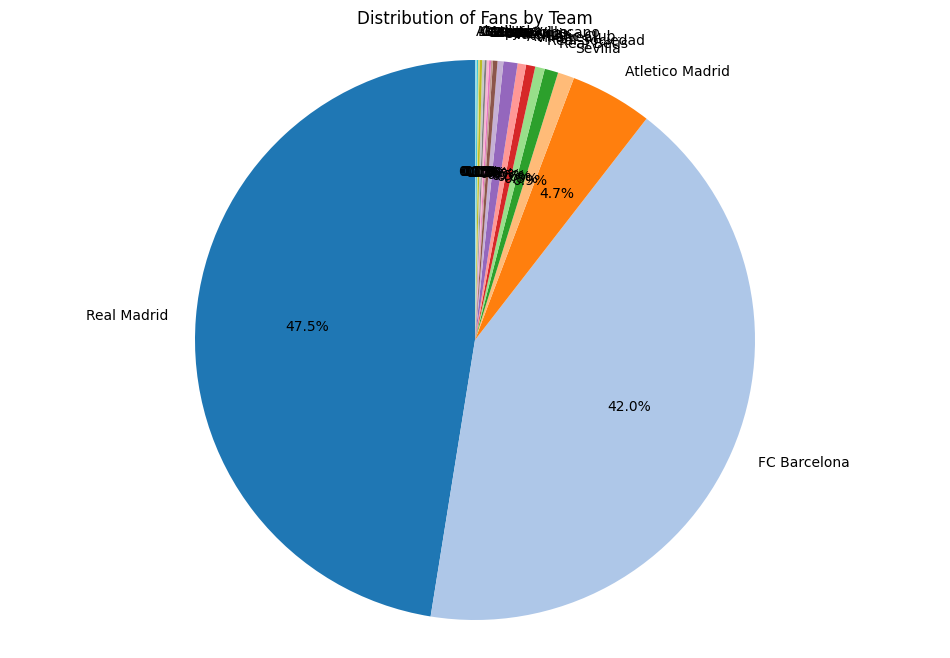

In [111]:
def clean_and_convert(value):
    if isinstance(value, str):  # check if the value is a string
        value = value.lower().replace("milliom", "million").replace("milllion", "million")
        value = value.replace("million", "").strip()
        try:
            return float(value) * 1e6
        except ValueError:
            return None
    elif isinstance(value, (int, float)):  # if it's already a number, just return it
        return value
    else:  # for other types, return None or handle differently
        return None

# Apply the function to the number_of_fans column
data['number_of_fans'] = data['number_of_fans'].apply(clean_and_convert)

# Drop NaN values (if any conversion failed)
data = data.dropna(subset=['number_of_fans'])

# Generate unique colors for each team
colors = plt.cm.tab20(range(20))

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(data['number_of_fans'], labels=data['club'], colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.title('Distribution of Fans by Team')
plt.show()